In [1]:
from fastai.imports import *
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore")

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
!ls ../input/covidfinal/COVID


covid  normal


In [3]:
!pip install google-cloud-bigquery-storage
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 171 kB 922 kB/s eta 0:00:01


In [4]:
path = Path('/kaggle/input/covidfinal/COVID/')

In [5]:
path

Path('/kaggle/input/covidfinal/COVID')

In [7]:
from fastai.vision.all import *


In [8]:
set_seed(41,True)
np.random.seed(41)
data = ImageDataLoaders.from_folder(path,valid_pct=0.1,item_tfms=Resize(256,256),bs=8, seed=41,batch_tfms=setup_aug_tfms([Brightness(),Rotate(max_deg=20, p=0.5),Resize(256)]))



In [9]:
data.train_ds.items[:3]

[Path('/kaggle/input/covidfinal/COVID/normal/NORMAL1355.jpg'),
 Path('/kaggle/input/covidfinal/COVID/covid/COVID495.jpg'),
 Path('/kaggle/input/covidfinal/COVID/covid/COVID350.jpg')]

In [10]:
data.c, len(data.train_ds), len(data.valid_ds)



(2, 2661, 295)

In [12]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))




Number of examples in training: 2661
Number of examples in validation: 295


In [13]:
xb,yb = data.one_batch()
xb.shape,yb.shape



(torch.Size([8, 3, 256, 256]), torch.Size([8]))

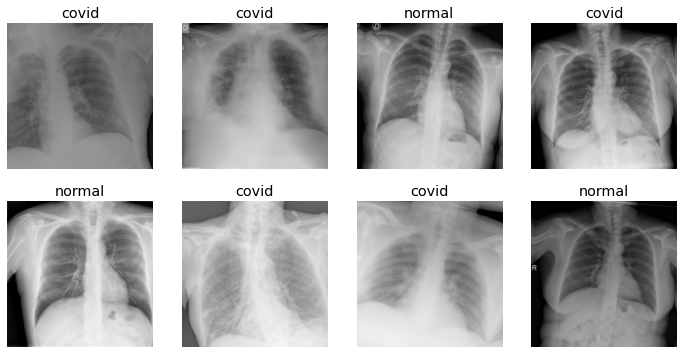

In [14]:
data.train.show_batch()

    

In [15]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=[accuracy, 
                             Precision(), 
                             Recall(), 
                             F1Score()]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [16]:
learn.fit_one_cycle(3)                             


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.835403,0.554048,0.783051,0.731844,0.891156,0.803681,05:52
1,0.524134,0.327070,0.871186,0.865772,0.877551,0.871622,06:43
2,0.436011,0.345699,0.837288,0.872180,0.789116,0.828571,06:42


Number of examples in testing: 295


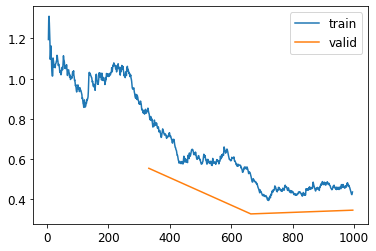

In [17]:
       
learn.recorder.plot_loss()                                

print("Number of examples in testing:", len(data.valid_ds))   


In [18]:
probs,targets = learn.get_preds() # Predicting without TTA



In [19]:
accuracy(probs,targets)



TensorBase(0.8373)

In [20]:
probs = np.argmax(probs, axis=0)

In [21]:

interp = ClassificationInterpretation.from_learner(learn)



In [22]:
interp.print_classification_report() 


              precision    recall  f1-score   support

       covid       0.81      0.89      0.85       148
      normal       0.87      0.79      0.83       147

    accuracy                           0.84       295
   macro avg       0.84      0.84      0.84       295
weighted avg       0.84      0.84      0.84       295



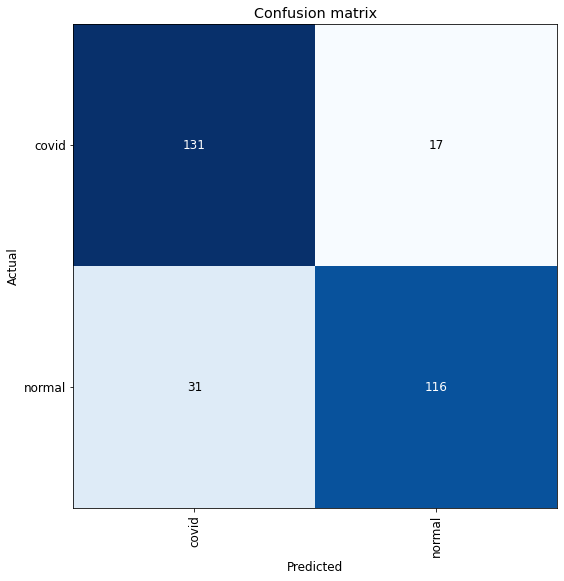

In [23]:
interp.plot_confusion_matrix(figsize=(8,8))

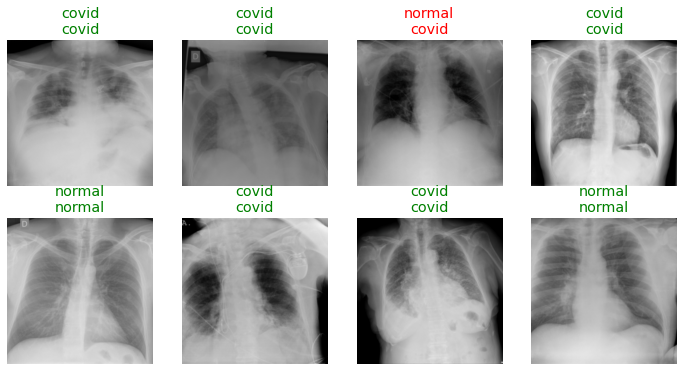

In [24]:
#PLOT TODOS
learn.show_results()

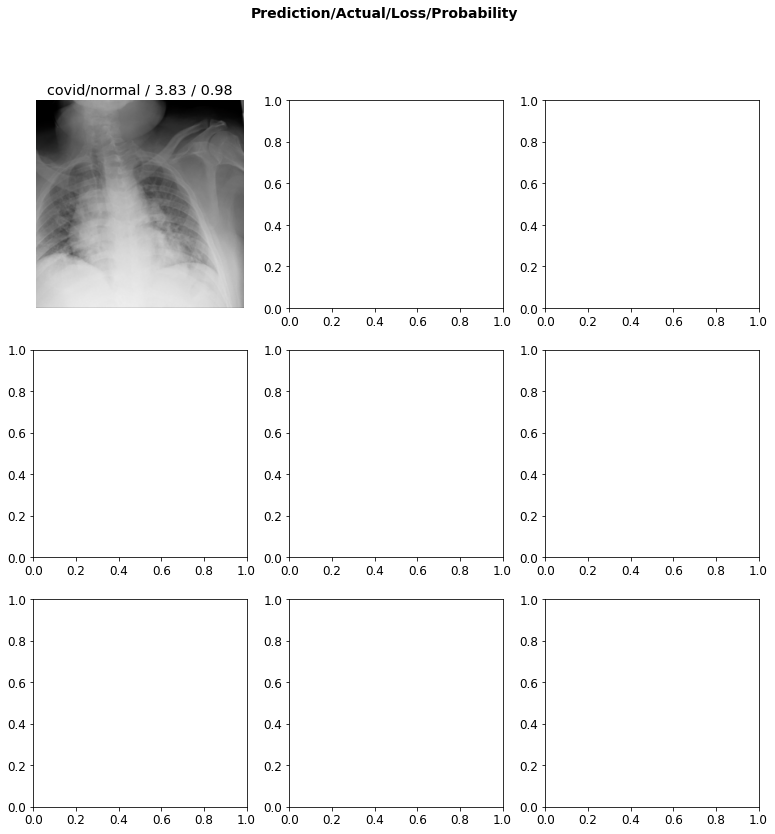

In [25]:
#PLOT ERRADOS 
interp.plot_top_losses(9, figsize=(13,13))